# Visualising audio with Python

<img src="https://miro.medium.com/max/1100/1*Zx9QAMPzxhama9O4q9xWXg.jpeg" width="600"/>

This notebook is intended to be an introduction for anyone interested in using python to interperate audio data.

## Contents
0. Installing and importing packages
1. Some theory
2. Reading in Audio Files and creating a waveform and sound graph
3. Creating a Spectogram
4. Creating a Mel Spectogram

## 0. Installing and importing packages

In [13]:
!pip install numba

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

## 1. Some theory 

Terms to know for Audio in Digital Form:

### Frequency (Hz)
- Frequency describes the differences of wave lengths.
- We interperate frequency has high and low pitches.

<img src="https://uploads-cdn.omnicalculator.com/images/britannica-wave-frequency.jpg" width="400"/>

### Intensity (db / power)
- Intensity describes the amplitude (height) of the wave.

<img src="https://ars.els-cdn.com/content/image/3-s2.0-B9780124722804500162-f13-15-9780124722804.gif" width="400"/>

### Sample Rate
- Sample rate is specific to how the computer reads in the audio file.
- Think of it as the "resolution" of the audio.

<img src="https://www.headphonesty.com/wp-content/uploads/2019/07/Sample-Rate-Bit-Depth-and-Bit-Rate.jpeg" width="400"/>


## 2. Reading in Audio Files and creating a waveform and sound graph
There are many types of audio files: `mp3`, `wav`, `m4a`, `flac`, `ogg`

In [15]:
audio_files = glob('*.wav')
print(audio_files)

['new_file.wav', 'mywav_reduced_noise2.wav', 'recordedFile.wav', 'tone_220.wav', 'output_sine_wave.wav', 'tone_440.wav']


In [16]:
# Play audio file
audio_path = audio_files[1]
IPython.display.Audio(audio_path)

In [25]:
y, sr = librosa.load(audio_path)
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sample rate: {sr}')

y: [ 1.06368301e-04  1.89067607e-04  4.81422830e-05  2.87800794e-05
  1.73481443e-04  2.12794374e-04  4.83889380e-05 -2.53350881e-05
  3.66596796e-05  1.20919605e-04]
shape y: (110080,)
sample rate: 22050


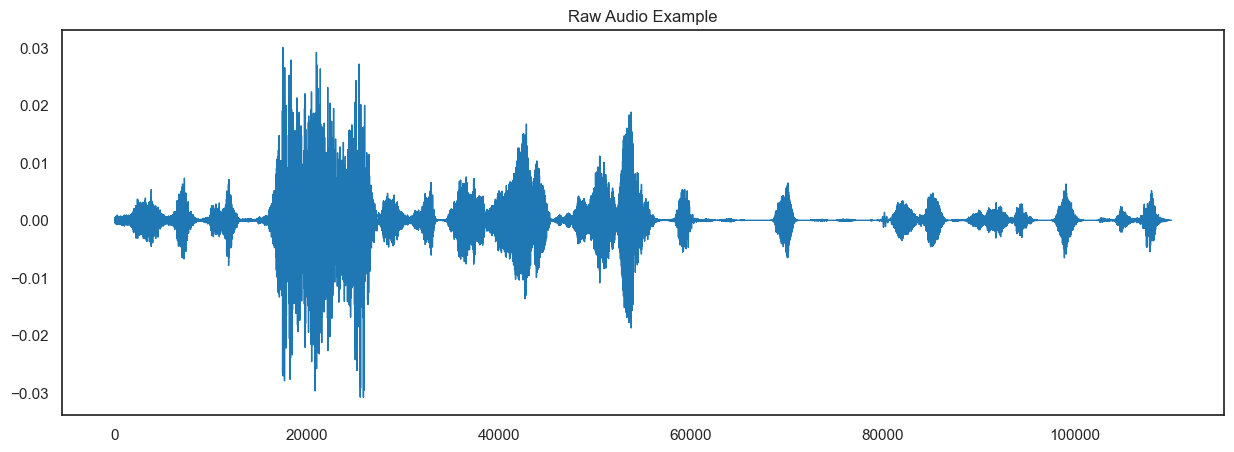

110080
CPU times: user 454 ms, sys: 130 ms, total: 584 ms
Wall time: 249 ms


In [26]:
%%time
pd.Series(y).plot(figsize=(15, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()
print(len(y))

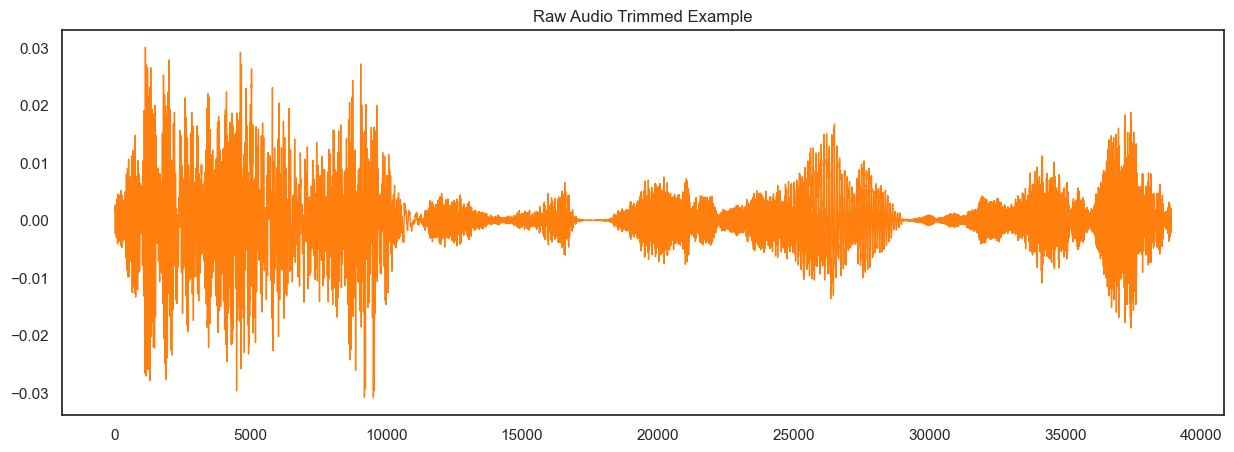

In [19]:
# Trimming leading/lagging silence
y_trimmed, _ = librosa.effects.trim(y, top_db=10)
pd.Series(y_trimmed).plot(figsize=(15, 5),
                  lw=1,
                  title='Raw Audio Trimmed Example',
                 color=color_pal[1])
plt.show()

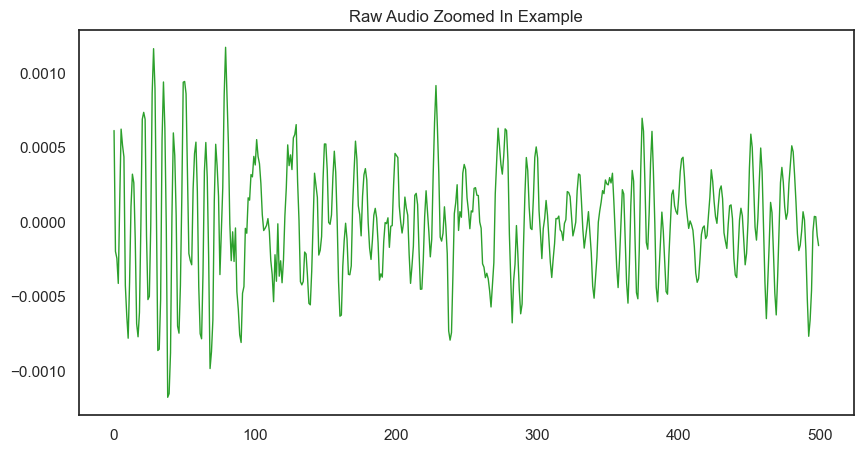

In [20]:
pd.Series(y[30000:30500]).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Zoomed In Example',
                 color=color_pal[2])
plt.show()

## 3. Creating a Spectogram

A spectrogram is a diagram with on the y-axis the frequency (Herz) and on the x-axis the time. The intensity of the colors give a indication of the energy of a certain frequency. 

Spectrograms are mostly used to visualise sounds with a low frequency as the image below shows.

Spectrograms are generated from audio samples using the Fourier Transform. 

In [21]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
print(S_db.shape)

(1025, 216)


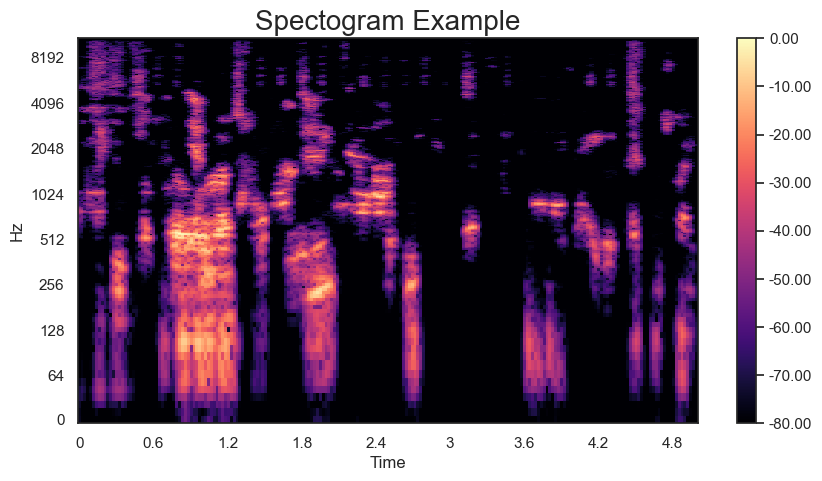

In [22]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

## 4. Creating a Mel Spectogram

Mel spectrogram is a likewise a spectrogram. But look at the y-axis: it's logarithmic.

This is useful as we humans also perceive frequencies. Take for example 100 Hz vs 200 Hz, we can hear the difference. However, for humans 10000 Hz vs 10100 Hz is much more difficult to hear.

See also: https://en.wikipedia.org/wiki/Mel_scale

#### Differences between Mel Spectrogram and Spectrogram:

Mel Spectrogram:
- uses Mel scale (= a log scale) instead of linear frequency on the y-axis
- it uses decibel scale (=a log scale) instead of amplitude to indicate colors.

In [23]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128 * 2,)#n_mels is the number of Mel bins used aka frequency bands)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

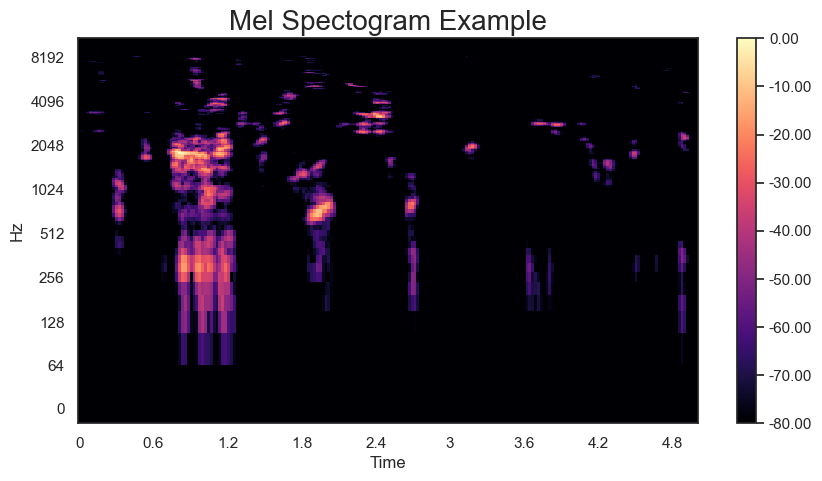

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()